In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# oad Dataset
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

# Preview dataset
print(df.head())
print(df.info())
print(df.describe())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [4]:
# Data Cleaning
# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



Missing values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


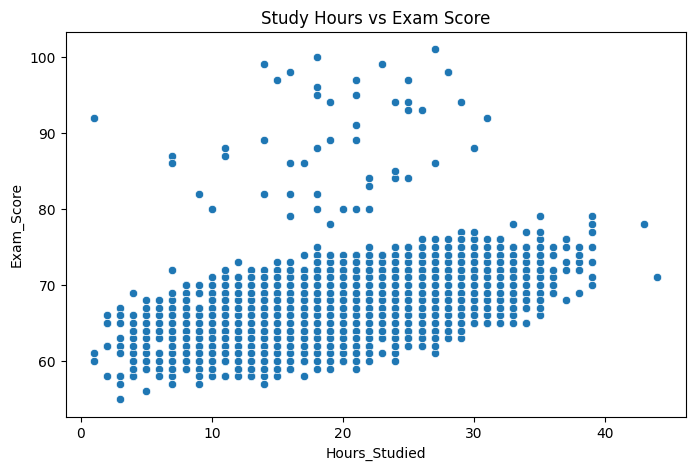

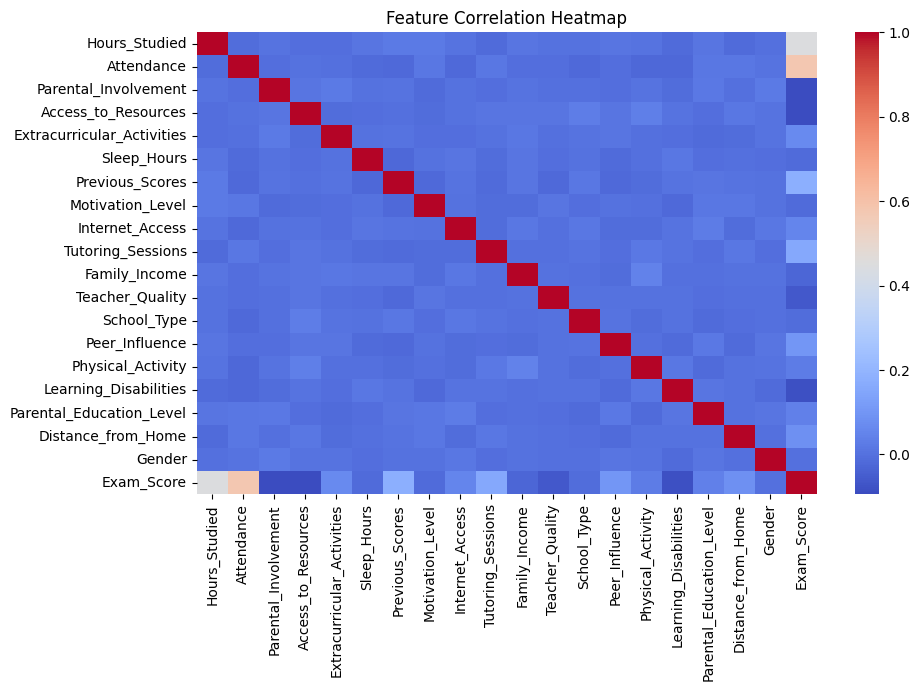

In [5]:
# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Study Hours vs Exam Score")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Train-Test Split
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Performance:
MAE: 1.0156733842910806
MSE: 4.401387320454959
RMSE: 2.097948359816075
R²: 0.688619401927732


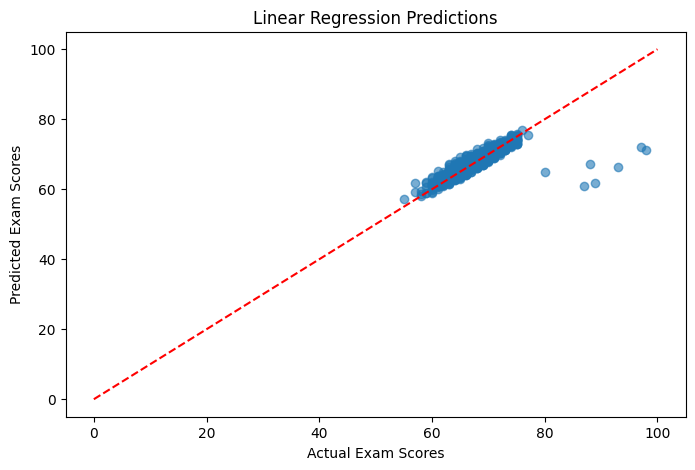

In [8]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluation
print("\nLinear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Prediction vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions")
plt.plot([0,100], [0,100], color='red', linestyle='--')
plt.show()

In [9]:
# Polynomial Regression (Bonus)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_poly, y_train)
y_poly_pred = poly_lr.predict(X_test_poly)

print("\nPolynomial Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_poly_pred))
print("MSE:", mean_squared_error(y_test, y_poly_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))
print("R²:", r2_score(y_test, y_poly_pred))


Polynomial Regression Performance:
MAE: 0.6105049432749436
MSE: 3.546321760424261
RMSE: 1.8831680117356129
R²: 0.7491118798871212


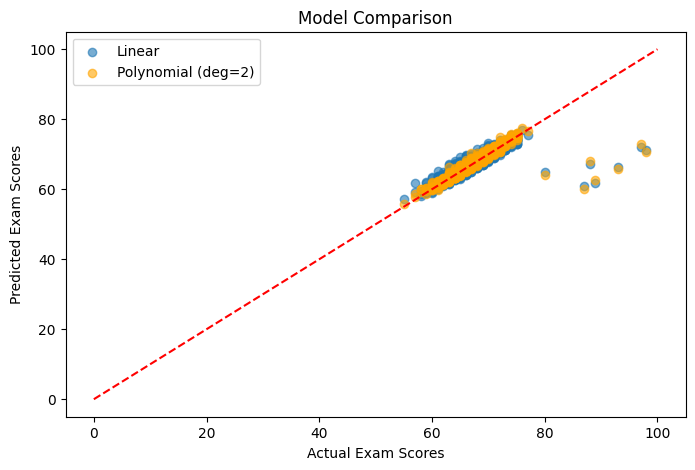

In [10]:
# Compare visually
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, label="Linear", alpha=0.6)
plt.scatter(y_test, y_poly_pred, label="Polynomial (deg=2)", alpha=0.6, color="orange")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.legend()
plt.title("Model Comparison")
plt.plot([0,100], [0,100], color='red', linestyle='--')
plt.show()


In [13]:
import random

# Generate random test data
sample_data = {
    "Hours_Studied": round(random.uniform(0, 12), 2),          # 0 - 12 hours
    "Attendance": round(random.uniform(50, 100), 2),           # 50% - 100%
    "Parental_Involvement": random.randint(0, 2),              # 0=Low,1=Med,2=High
    "Access_to_Resources": random.randint(0, 1),               # 0=No,1=Yes
    "Extracurricular_Activities": random.randint(0, 1),        # 0=No,1=Yes
    "Sleep_Hours": round(random.uniform(4, 10), 1),            # 4 - 10 hours
    "Previous_Scores": round(random.uniform(40, 100), 1),      # 40 - 100 marks
    "Motivation_Level": random.randint(0, 2),                  # 0=Low,1=Med,2=High
    "Internet_Access": random.randint(0, 1),                   # 0=No,1=Yes
    "Tutoring_Sessions": random.randint(0, 5),                 # 0 - 5
    "Family_Income": random.randint(0, 2),                     # 0=Low,1=Med,2=High
    "Teacher_Quality": random.randint(0, 2),                   # 0=Low,1=Med,2=High
    "School_Type": random.randint(0, 1),                       # 0=Govt,1=Private
    "Peer_Influence": random.randint(0, 2),                    # 0=Neg,1=Neutral,2=Pos
    "Physical_Activity": random.randint(0, 10),                # Hours per week
    "Learning_Disabilities": random.randint(0, 1),             # 0=No,1=Yes
    "Parental_Education_Level": random.randint(0, 2),          # 0=Low,1=Med,2=High
    "Distance_from_Home": round(random.uniform(0, 20), 1),     # 0 - 20 km
    "Gender": random.randint(0, 1)                             # 0=Male,1=Female
}

# Convert to DataFrame
input_df = pd.DataFrame([sample_data])
print("Random Test Student Data:\n", input_df)

# Predict using trained Linear Regression
predicted_score = lr.predict(input_df)[0]
print("\nPredicted Exam Score (Linear Regression):", round(predicted_score, 2))

# Predict using Polynomial Regression
predicted_score_poly = poly_lr.predict(poly.transform(input_df))[0]
print("Predicted Exam Score (Polynomial Regression):", round(predicted_score_poly, 2))


Random Test Student Data:
    Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0           6.45       79.06                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           1          4.1             83.2                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                  4              2                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               0                  1                      0   

   Parental_Education_Level  Distance_from_Home  Gender  
0                         2                14.2       1  

Predicted Exam Score (Linear Regression): 70.04
Predicted Exam Score (Polynomial Regression): 67.24
